In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from Modulacao_AM.modAM import mod_dsbsc_am, demod_dsbsc_am, demod_AM_convecional, mod_AM_convencional


<img src="Figs/fga.png" alt="isolated"/>



<h1 style="text-align: center;">Modulação AM</h1>

<h3 style="text-align: center;">Disciplina: Princípios de Comunicação</h3>


<p style="text-align: center;">Prof. Daniel C. Araújo</p>


## Conteúdo

1. Introdução 
2. Modulação AM-DSB 
3. Modulação AM convencional
4. Modualçao AM-SSB
5. Exemplo de Moduladores

<h1 style="text-align: center;">Introdução</h1>

## Conceito 
![modAM](Figs\AM\transmissao.png "Modulador AM")

## Vantagens 
 - Conversão de frequência
 - Redução do tamanho das antenas
 - Acomodar diferentes sinais 


## Tipos de modulação

 - DSB-SC AM
    - Double Sideband Suppressed Carrier 
 - AM convencional (DSB-FC)
    - Double Sideband Full Carrier
 - SSB
    - Single Sideband 
 - VSB
    - Vestigial Sideband


<h1 style="text-align: center;">DSB-SC AM</h1>



## Definição da mensagem

  - Considere, sem perda de generalidade, uma mensagem 

  $$ 
  m(t) = A_m cos(2\pi f_m t)
  $$

In [2]:
def m_t(amplitude, frequency):
    t = np.linspace(0, 1, 1000) 
    return amplitude * np.cos(2 * np.pi * frequency * t), t

def plot_messagem(amplitude, frequency):
    m, t =  m_t(amplitude, frequency)
    plt.ylim(-5,5)
    plt.plot(t,m)
    plt.show()


a = widgets.FloatSlider(min=1,max=5,step=0.5, description="Amplitude [V]")
f = widgets.FloatSlider(min=10,max=100,step=1, description="frequência [Hz]")

# An HBox lays out its children horizontally
ui = widgets.HBox([a, f])

out = widgets.interactive_output(plot_messagem, {'amplitude': a, 'frequency': f})

display(out, ui)





Output()

## Definição da portadora

 - Para transmitir a informação, considere um função senoidal  

  
  $$ c(t) = A_c cos(2\pi f_c t + \phi _c)
  $$

-  O sinal modulado na saída do modulador AM-DSB é  

    $$
       s(t) = m(t)*c(t)
    $$


In [3]:
N_samples = 1000                 # Número de amostras
fs = 2e3                         # Frequência de amostragem
T_simul  = N_samples/fs          # Tempo de simulação


def sinal_modulado(A_m , f_m, f_c):
    A_c = 1
    t = np.linspace(0,N_samples-1,N_samples)/fs  # Instantes de tempo
    m_t = A_m*np.cos(2*np.pi*f_m*t)
    u_t = mod_dsbsc_am(m_t,t,A_c,f_c,0)

    return  u_t, t, m_t

def plot_sinal_modulado(A_m , f_m, f_c = 125):
    s, t , m_t= sinal_modulado(A_m,f_m, f_c )
    plt.plot(t,s)
    plt.plot(t,m_t,'g--')
    plt.ylim(-1.2,1.2)
    plt.show()


a = widgets.FloatSlider(min=0.1,max=1,step=0.01, description="Amplitude [V]")
f = widgets.FloatSlider(min=2,max=10,step=1, description="frequência [Hz]")

# An HBox lays out its children horizontally
ui = widgets.HBox([a,f])

out = widgets.interactive_output(plot_sinal_modulado, {'A_m': a,'f_m':f})

display(out, ui)

Output()

## Representação em Frequência



In [4]:
## Visualização do espectro
def espectro_am_dsb(A_m , f_c , f_m ):
   u_t, t, m_t = sinal_modulado(A_m , f_m, f_c)
   U_f = np.fft.fftshift(np.fft.fft(u_t))
   f = np.linspace(-fs/2,fs/2,N_samples)
   return U_f, f

def plot_espectro(A_m , f_c, f_m = 5):
    U_f, f = espectro_am_dsb(A_m , f_c, f_m)
    plt.plot(f,np.abs(U_f))
    plt.xlim(np.min(f),np.max(f))
    plt.show()


a = widgets.FloatSlider(min=0.1,max=1,step=0.01, description="Amplitude [V]")
f = widgets.FloatSlider(min=100,max=500,step=10, description="frequência da portadora [Hz]")

# An HBox lays out its children horizontally
ui = widgets.HBox([a,f])

out = widgets.interactive_output(plot_espectro, {'A_m': a,'f_c':f})

display(out, ui)

Output()

## Análise em frequência
Considere o sinal transmitido no tempo:
$$
 u(t) = m(t)\cos(2\pi f_c t) 
$$
Utilizando a transformada de Fourier:
$$
 U(f) = M(f) \circ C(f) \newline
      = M(f) \circ \frac{1}{2}(\delta (f - f_c) + \delta (f - f_c))  \newline
      =  M(f) \circ \frac{1}{2}\delta(f - f_c) +  M(f) \circ \frac{1}{2}\delta(f - f_c) \newline 
      = \frac{1}{2} M(f - f_c) + \frac{1}{2}M(f + f_c)
$$

IMPORTANTE: A modualação AM desloca o espectro da mensagem para a frequência da portadora.

## Potência do sinal transmitido
$$
 P_n = \lim _ {T \rightarrow \infty} \int _{-T/2}^{T/2} u^2(t) dt \newline
     =  \lim _ {T \rightarrow \infty} \int _{-T/2}^{T/2} A_c^2 m^2(t)\cos^2(2\pi f_c t)  dt \newline
     = \frac{A_c^2}{2} \lim _ {T \rightarrow \infty} \int _{-T/2}^{T/2}  m^2(t)[1 + \cos(4\pi f_c t)]dt \newline
     =  \frac{A_c^2}{2} P_m
     $$

em que, $P_n = \lim _ {T \rightarrow \infty} \int _{-T/2}^{T/2} m^2(t)dt$

## Demodualação de sinais DSB-SC
Para simplificar nossa análise considere o sinal recebido igual ao sinal transmitido 
$$
r(t) = u(t) \newline
r(t)    = m(t)\cos(2\pi f_c t) 
$$
Como primeiro passo, utilizamos um oscilador local para realocar a mensagem em sua frequência original.
$$
r(t)\cos(2\pi f_c t + \phi) =  m(t)\cos(2\pi f_c t) \cos(2\pi f_c t + \phi) \newline 
r(t)\cos(2\pi f_c t + \phi) =  \frac{1}{2}m(t)[\cos(\phi) + \cos(4\pi f_c t + \phi)]

$$
OBSERVAÇÕES: 

 - Presença de componente de alta-frequência
 - Necessário remover
 - $\phi$ indica sincronização necessária

## Filtragem 
![demodAM](Figs\AM\receptor.png "Receptor AM")

Text(0, 0.5, 'Sinal multiplicado')

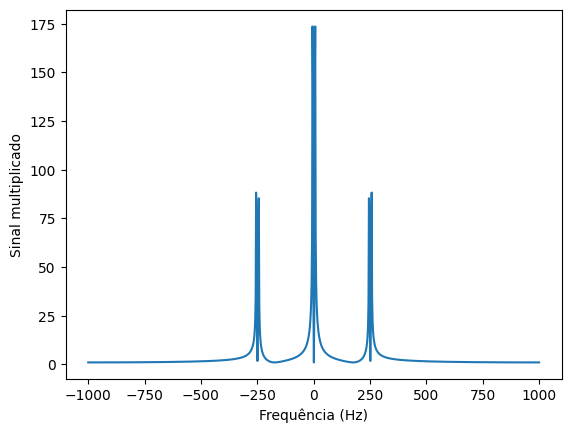

In [5]:
N_samples = 1000                 # Número de amostras
fs = 2e3                         # Frequência de amostragem
T_simul  = N_samples/fs          # Tempo de simulação
t = np.linspace(0,N_samples-1,N_samples)/fs  # Instantes de tempo

# Definir sinal mensagem
fm  = 5
A_m = 2
m_t = np.cos(2*np.pi*fm*t)

# Modualação

fc = 125
A_c = 1
u_t = mod_dsbsc_am(m_t,t,A_c,fc,0)

# Demodulação
cutoff = fm + 20
g_t, r_t = demod_dsbsc_am(u_t,t,A_c,fc,cutoff,fs)

R_f = np.fft.fftshift(np.fft.fft(r_t))
f = np.linspace(-fs/2,fs/2,N_samples)

plt.plot(f,np.abs(R_f))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Sinal multiplicado')

Text(0, 0.5, 'Sinal multiplicado')

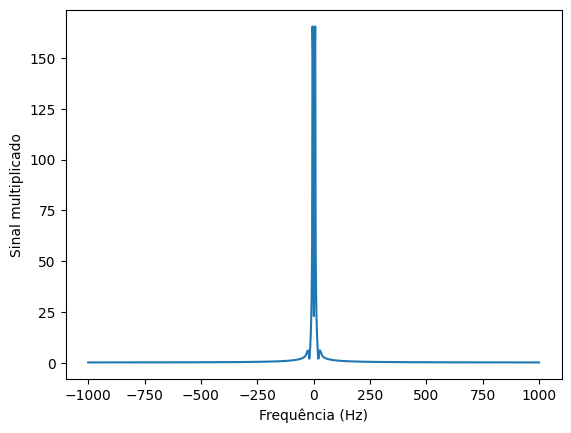

In [6]:
G_f = np.fft.fftshift(np.fft.fft(g_t))
plt.plot(f,np.abs(G_f))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Sinal multiplicado')

Text(0, 0.5, 'Mensagem estimada')

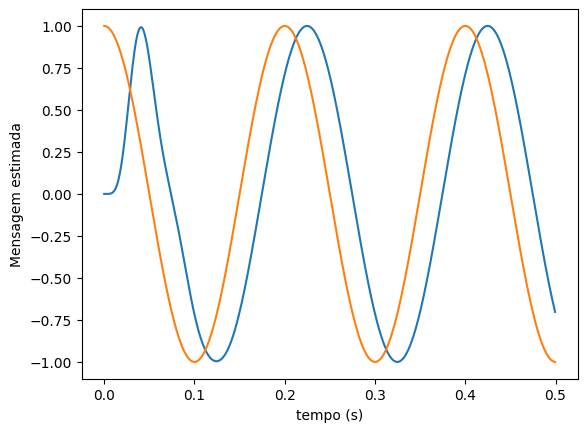

In [7]:
amp = 2
plt.plot(t,amp*g_t)
plt.plot(t,m_t)
plt.xlabel('tempo (s)')
plt.ylabel('Mensagem estimada')

<h1 style="text-align: center;">AM Convecional</h1>

## AM - Convencional : Definição
![conceito](Figs\AM\am_conv.png "Conceito de AM-convencional")

In [8]:
N_samples = 1000                 # Número de amostras
fs = 2e3                         # Frequência de amostragem
T_simul  = N_samples/fs          # Tempo de simulação


def sinal_modulado(A_m , alpha, f_m, f_c):
    A_c = 1
    t = np.linspace(0,N_samples-1,N_samples)/fs  # Instantes de tempo
    m_t = A_m*np.cos(2*np.pi*f_m*t)
    u_t = mod_AM_convencional(m_t,t,A_c,fc,alpha)

    return  u_t, t, m_t

def plot_sinal_modulado( alpha, f_m, f_c = 125):
    A_m = 1
    s, t , m_t= sinal_modulado(A_m , alpha, f_m, f_c)
    plt.plot(t,s)
    plt.plot(t,alpha*m_t + 1,'g--')
    plt.ylim(-2,2)
    plt.show()


a = widgets.FloatSlider(min=0.1,max=1.5,step=0.01, description="Índice de modulação ")
f = widgets.FloatSlider(min=2,max=10,step=1, description="frequência [Hz]")

# An HBox lays out its children horizontally
ui = widgets.HBox([a,f])

out = widgets.interactive_output(plot_sinal_modulado, {'alpha': a,'f_m':f})

display(out, ui)

Output()

## Representação tempo x frequência

In [9]:
## Visualização do espectro
def espectro_am_dsb(A_m , alpha, f_c , f_m ):
   u_t, t, m_t = sinal_modulado(A_m , alpha, f_m, f_c)
   U_f = np.fft.fftshift(np.fft.fft(u_t))
   f = np.linspace(-fs/2,fs/2,N_samples)
   return U_f, f

def plot_espectro(alpha, f_c, f_m = 100):
    A_m =1
    U_f, f = espectro_am_dsb(A_m ,alpha,  f_c, f_m)
    plt.plot(f,np.abs(U_f))
    plt.xlim(np.min(f),np.max(f))
    plt.show()


a = widgets.FloatSlider(min=0.1,max=1.5,step=0.01, description="Índice de modulação ")
f = widgets.FloatSlider(min=300,max=600,step=20, description="frequência [Hz]")

# An HBox lays out its children horizontally
ui = widgets.HBox([a,f])

out = widgets.interactive_output(plot_espectro, {'alpha': a,'f_c':f})

display(out, ui)

Output()

## Exemplo 
Obtenha o sinal AM convencional para o sinal mensagem 

$$
m(t) = 3\cos(200\pi t) + \sin(600\pi t).
$$

Considere um índice de modulação igual a 0.85 e uma portadora $c(t) = \cos(2 \times 10^5t)$. Determine a potência transmitida.

## Solução
Para normalizar o sinal $m(t)$ é necessário encontrar o valor máximo da função.

$$
m^{\prime}(t) = -600\pi\sin(200\pi t) + 600\pi\cos(600\pi t)
$$
Igualando a zero

$$
\begin{align*}
   -600\pi\sin(200\pi t) + 600\pi\cos(600\pi t) = & 0 \\
   \cos(600\pi t) = & \sin(200\pi t)\\
                  = &  \cos(\frac{\pi}{2} - 200\pi t)
\end{align*}
$$
Portanto,

$$
\begin{align*} 
600\pi t & = \frac{\pi}{2} - 200\pi t \\
800\pi t & = \frac{\pi}{2} \\
       t & = \frac{1}{1600}
\end{align*}
$$
O valor máximo portanto é 

$$
 m \left( \frac{1}{1600}\right) = 3.6955
$$

Normalizando o sinal mensagem temos:

$$
   \begin{align*}
   m_n(t) & =  m(t) \\
          & = 0.8118\cos(200\pi t) + 0.2706\sin(200\pi t)
   \end{align*}
$$

## Demodulação

Implementação de um detector de envelope
 - Circuito retificador
 - Filtro passa-baixa 
    > A saída do demodulador é dada por $$d(t) = g_1 + g_2 m(t) $$

 - Sinal de saída do demodulador possui uma componente DC que precisa ser removida.

![demod](Figs\AM\circuito_rc.png "Circuito Demodulador AM")

## Impacto da constante RC

Baixa constante RC| Alta constante RC |
---|---|
Saída do filtro varia abruptamente | Capacitor demora para descarregar | 
Presença de componentes de alta-frequência  | perda de informação |





![envelope](Figs\AM\envelope.png "Circuito Demodulador AM")

<h1 style="text-align: center;">Modulação SSB</h1>

## Definição

- Características das modulações DSB-SC e DSB convencional
    - Espectro simétrico
    - Uso do canal com ocupação de $2W$
    - Uso ineficiente

- Modulação SSB
    - Transmissão com metade da Banda
    - Explora a simetria do espectro




![ssb](Figs\AM\ssb.png "Modulação SSB")

## Formulação da Ideia

Considere o filtro de transmissão 

$$
H(f) = \begin{cases}
1, & |f| > f_c, \\
0, & \textrm{caso contrário}
\end{cases}
$$

$$
H(f) = U(f - f_c) + U(-f - f_c)
$$

Portanto, o espectro SSB é dado por 

$$
\begin{align*}
 \mathcal{F}[u(t)] & = \mathcal{F}[u_{DSB} \circ h(t)]  \\
                   & = \mathcal{F}[(2Am(t)\cos(2\pi f_ct)) \circ h(t)] \\
                   & = AM(f - f_c)U(f -f_c) + AM(f + f_c)U(-f -f_c) \\
                   & = AM(f)U(f)_{f = f-f_c} + AM(f)U(-f)_{f = f+f_c}
\end{align*}
$$

Convertendo para o tempo:

$$
\begin{align*} 
u(t) &= A m(t) \circ  \mathcal{F}^{-1}[U(f)] \exp(\jmath 2 \pi f_c t) + A m(t) \circ  \mathcal{F}^{-1}[U(-f)] \exp(-\jmath 2 \pi f_c t) \\
     &= A m(t) \circ \frac{1}{2}\left( \delta (t) + \frac{\jmath}{2\pi t} \right)\exp(\jmath 2 \pi f_c t) +  A m(t) \circ \frac{1}{2}\left( \delta (t) - \frac{\jmath}{2\pi t} \right)\exp(-\jmath 2 \pi f_c t) \\
     &= \frac{A}{2}[m(t) + \jmath \hat{m}(t)]\exp(\jmath 2 \pi f_c t) + \frac{A}{2}[m(t) - \jmath \hat{m}(t)]\exp(-\jmath 2 \pi f_c t) \\
     &= Am(t)\cos( 2 \pi f_c t) - A\hat{m}(t)\sin( 2 \pi f_c t) 
\end{align*}
$$
Portanto, a expressão banda superior é dada por

$$
u(t) = m(t)\cos( 2 \pi f_c t) - \hat{m}(t)\sin( 2 \pi f_c t).
$$

Para calcular a banda inferior tem-se que 

$$
\begin{align*}
u(t) + u_l(t) &= 2Am(t)\cos(2\pi f_ct)  \\
u_l(t)        &= 2Am(t)\cos(2\pi f_ct) - A m(t)\cos( 2 \pi f_c t) + A\hat{m}(t)\sin( 2 \pi f_c t) \\
u_l(t)        &= A m(t)\cos( 2 \pi f_c t) + A\hat{m}(t)\sin( 2 \pi f_c t)
\end{align*}
$$

<h1 style="text-align: center;">Modulação VSB</h1>

## Conceito

* Uma variação da modulação SSB, mas com a presença de uma banda vestigial

![vsb](Figs\AM\vsb.png "Modulação VSB")

## Qual filtro é possível utilizar?

Considere o sinal transmitido
$$
\begin{align*}
 \mathcal{F}[u(t)] & = \mathcal{F}[u_{DSB} \circ h(t)]  \\
                   & = \mathcal{F}[(2Am(t)\cos(2\pi f_ct)) \circ h(t)] \\
                   & = \frac{A}{2}(M(f-f_c) + M(f+f_c))H(f)
\end{align*}
$$
Na entrada do receptor tem-se que :
$$
\begin{align*}
v(t)     &= u(t) \cos(2\pi f_ct)  \\
V(f)     & =\frac{A}{2} [U(f - fc) + U(f + fc)] \\
         &  \frac{A}{4}\left[(M(f-2f_c) + M(f))H(f-f_c) +  (M(f) + M(f+2f_c))H(f+f_c) \right]
\end{align*}
$$
Após o uso de filtro passa-baixa
$$
\begin{align*}
V(f)     & =  \frac{A}{4}M(f)\left[(H(f-f_c) + H(f+f_c) \right]
\end{align*}
$$
para que não haja distorção no sinal tem-se que :

$$
H(f-f_c) + H(f+f_c) = \textrm{constante}
$$

<h1 style="text-align: center;"> Exemplo de Moduladores</h1>


## Moduladores por série de potência

Esse tipo de modulador é caracterizado pela a utilização de um dispositivo não-linear. Considere a relação de entrada e saída

$$
v_o(t) = a_1v_i(t) + a_2v_2(t),
$$
em que,
$$
v_i(t) = m(t) +A_c \cos(2\pi f_c t).
$$

O sinal na saída do dispositivo é portanto
$$
\begin {align*}
v_o(t)  &=  a_1m(t) +a_1A_c \cos(2\pi f_c t) + a_2(m^2(t) +A^2_c \cos^2(2\pi f_c t) + 2m(t)A_c \cos^2(2\pi f_c t)) \\
        &=  A_c a_1\left[ 1 + \frac{m(t) a_2}{a_1}\right]\cos(2\pi f_c t) + a_2m^2(t) + a_2A^2_c \cos^2(2\pi f_c t) \\
\end{align*}
$$
Após o uso de um filtro de banda-passante o sinal transmitido é 
$$
v_o(t) = A_c a_1\left[ 1 + \frac{m(t) a_2}{a_1}\right]\cos(2\pi f_c t)
$$

![potencia](Figs\AM\modulador_potencia.png "Modulador por Série de Potência")